<a href="https://colab.research.google.com/github/OnderKaratas/LinearRegressionModelforHouseSales/blob/main/MakersProgrammingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns #to see heatmap of dataset
import tensorflow as tf #to calculate line regression
import pandas as pd #to open and convert dataset
import matplotlib.pyplot as plt #to show results and dataset
import numpy as np #numpy library to create random numbers


#EXPLORATORY DATA ANALYSIS

#Read the dataset 
dt=pd.read_csv("kc_house_data.csv")
dt.info()
dt.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We have 20 variables. One of them will be the dependent variable and others will be independent variables. For our case, the dependent variable must be price and other variables will affect and change the price.

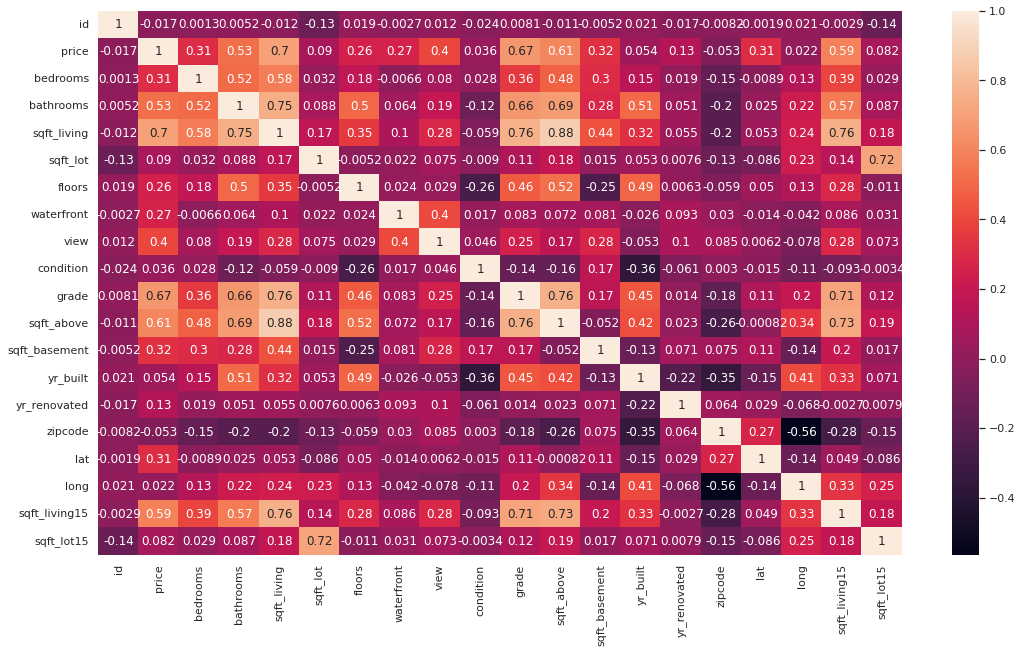

In [3]:
#The Heatmap of Dataset by using Seaborn
dt.head()
dt_corr=dt.corr()#to see the relationship of variables, we must correlate
sns.set(rc = {'figure.figsize':(18,10)})#to make it bigger
sns.heatmap(dt_corr,annot=True)

*   Bedrooms
*   Bathrooms
*   floors
*   sqft_living
*   waterfront
*   view
*   grade
*   sqft_above
*   sqft_basement
*   yr_renovation
*   lat
*   sqft_living15

These variables are the ones who has great impact on the price of the house but "date" and "id" is not important for any of the variables.


In [4]:
#PRE_PROCEEDING OF DATASET
#Let's proceed the dataset accordingly to our knowledge
#we need x variables for independent variables and y variable for dependent variable
x= dt.drop(['price','id','date'],axis=1)# I removed the id and date too in this part because it's irrelevant
y= dt.price

from sklearn.preprocessing import StandardScaler # we will scale our numeric values to get same units
ss= StandardScaler()

from scipy import stats # to eliminate outliers from our dataset


from sklearn.model_selection import train_test_split #to split dataset to train and test
#For each random_state, there are different r2 and rmse values. 
#So to find best line regretion, I will go thorough for each 'random state' number

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=42)
#I will use the %20 of the dataset as test dataset and %80 of the dataset will be train dataset

#Processing of Numeric Values
x_train.drop_duplicates()#to remove any duplicate rows if there are
x_train_num = x_train[(np.abs(stats.zscore(x_train)) < 2.5).all(axis = 1)]
x_train_num=pd.DataFrame(ss.fit_transform(x_train),index=x_train.index, columns=x_train.columns)


In [16]:
#Linear Regression
#y=g(Xt*W+W0) is our function where is W is weight and Xt is the tranposed x variables and y is the estimated y value
#W0 is the bias of the function
#g will be relu activation function 
#We have x variables but we don't know the weights.
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow_addons as tfa


model=Sequential()#the neural network
model.add(Dense(18,input_shape=(18,),activation="relu", kernel_initializer='normal'))#input layer that has 18 inputs
model.add(Dense(6,activation='relu'))#hidden layer to get higher scores
model.add(Dense(1, kernel_initializer="normal"))#output layer
model.compile(tf.keras.optimizers.RMSprop() ,loss=tf.keras.losses.MeanSquaredError(),metrics=[tfa.metrics.r_square.RSquare()])
#RMSprop is the optimizer function
#MeanSquaredError is the loss function
model.fit(x_train,y_train,epochs=500, validation_split=0.01)#traning the model


Epoch 1/500
535/535 [==============================] - 4s 3ms/step - loss: 282937458688.0000 - r_square: -1.1742 - val_loss: 180733526016.0000 - val_r_square: 0.0033
Epoch 2/500
535/535 [==============================] - 1s 2ms/step - loss: 129501339648.0000 - r_square: 0.0048 - val_loss: 167532658688.0000 - val_r_square: 0.0761
Epoch 3/500
535/535 [==============================] - 1s 2ms/step - loss: 119318568960.0000 - r_square: 0.0831 - val_loss: 161769029632.0000 - val_r_square: 0.1078
Epoch 4/500
535/535 [==============================] - 1s 2ms/step - loss: 114190262272.0000 - r_square: 0.1225 - val_loss: 153916948480.0000 - val_r_square: 0.1512
Epoch 5/500
535/535 [==============================] - 1s 2ms/step - loss: 106957242368.0000 - r_square: 0.1781 - val_loss: 140981354496.0000 - val_r_square: 0.2225
Epoch 6/500
535/535 [==============================] - 1s 2ms/step - loss: 96686112768.0000 - r_square: 0.2570 - val_loss: 123466268672.0000 - val_r_square: 0.3191
Epoch 7/50

In [17]:
result=model.evaluate(x_test,y_test)

136/136 [==============================] - 0s 1ms/step - loss: 55147073536.0000 - r_square: 0.6352


The linear regression model has an r2 score of more than 60%, which should be sufficient for the task to be successful.